# Session 5, Hypothesis Testing and Confidence Interval (CI)

# 1. Explanations of regression statistics

### R-squared

In the same way as for the bi-variate regression:
$$
R^2=1-\frac{RSS}{\sum\limits_i (y_i-\overline{y})^2}=\frac{\sum\limits_i (\hat{y}_i-\overline{y})^2}{\sum\limits_i (y_i-\overline{y})^2},
$$
where $\overline{y}=\sum\limits_i y_i$ is the sample mean of observed values of responce variable. This way $R^2$ is often interpreted as a fraction of responce variable's variance explained by linear model. $R^2=1$ is equivalent to $RSS=0$, i.e. the model fits the observations exactly, i.e. responce variable depends linearly on the explaining variables. On the other hand, $R^2=0$ means that the model always predicts the sample mean $\overline{y}$, i.e. explaining variables $x$ have no effect on responce variable $y$. 

Least-square criteria is equivalent to maximizing $R^2$.

### Confidence intervals
As before uncertainty of the model predictions comes together with the uncertainty of the model coefficients' estimates $\hat{w}$. The last, treated as a random vector has a variance-covariance matrix 
$$
Var(\hat{w})=(X^T X)^{-1}\sigma^2,
$$
while for $\sigma^2$ we can use one of the estimates (4) or (4') - usually the last unbiased one.

Based on this estimate as well as the normality of $\hat{w}$ distribution, the confidence intervals for each $\hat{w}_j$ are constructred (i.e. ranges containing the "true" value of $w_j$ with a certain level of confidence $1-\alpha$.

### Hypothesis testing: P-values, t-statistics and F-statistics

For each estimate $\hat{w}_i$ and the hypothesized value $w_i^*$ (often $w_i^*=0$), the corresponding $t$-statistics is defined as
$$t=\frac{w_i^*-\hat{w}_i}{ \sqrt {Var( \hat{w}_i)}}.$$
Based on the value of $t$-statistics, which is known to follow Students distribution (approximately normal for large $N$), the $p$-value is defined to show our confidence that the observed deviation of the estimate $\hat{w}_i$ from a hypothesized value $w_i^*$ is simply a matter of chance (specifically it denotes a probabiity of having the absolute value of the $t$-statistics for the true value $w_i$ modulo higher than the observed one. 

This way once $p$-value (confidence level for the hypothesis) is lower than a certain threshold (typically $5\%$), the hypothesis of having the true value of $w_i$ to be $w_i^*$ is rejected.

The most common example is assuming a null-hypothesis $w_i^*=0$, meaning that explaining variable $x_i$ has actually no impact on the response variable $y$. Those $p$-values for the null-hypothesis are reported by R and python for every regressor $x_i$ in order to show if the impact of the considered regressor is statistically significant. 

In the same way as for the bi-variate regression, low $p$-values do not prove that: 1) impact of $x_i$ on $y$ is actually linear, or that 2) the estimate we have for the coefficient $w_i$ is the true one. In turn, having high value of $p$-value by itself does not prove that $y$ is independent on $x_i$ (first of all linear effect could be there, just disguised by noise, second - the effect could be non-linear).

Regressors having high $p$-values are usually excluded from the model in order to stay free from the random insignificnt effects, reducing the risk of overfitting (this is however not the only way of fighting it).

However often we need to test the significance of a subgroup of regressors together (or all of the regressors) testing the entire model against the null-hypothesis that a model based on a smaller subset of $m$ regressors (or just the intercept) of the regressors actually performs not worse than the original one.  The following $F$-statistics helps with that:
$$
F=\frac{(RSS_0-RSS_1)(N-n)}{RSS_1\cdot (n-m)},
$$
where $RSS_1$ is the optimal (least-square) $RSS$ value for the original regression and $RSS_0$ - is the optimal $RSS$ value of the regression based on the considered subset of $m$ regressors (testing the hypothesis that only those $m$ regressors are significant). R and python will report the value of $F$ for the null-hypothesis that only the intercept is significant, as well as the $p$-value characterizing this $F$-statistics.



# 2. Feature selection

Reducing complexity of the model (number of features or their dimensionality) is usually recommended in such cases. The most straighforward way of doing so is through feature selection. 

Select a subset of the regressors of the given size $k$ maximizing the model fit ($R^2$).  
Step-forward  
Step-backward  

Drawback - we're discarding information from the feature space.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline
import statsmodels.formula.api as smf
from scipy.stats import t

Populating the interactive namespace from numpy and matplotlib


In [2]:
path = 'https://serv.cusp.nyu.edu/~cq299/ADS2016/Data/'
matplotlib.rcParams['figure.figsize'] = [10,4]

# Example 1
### Revisit univariate regression with housing price

In [3]:
data1 = pd.read_csv(path + 'Se3_Ex1.csv')
data1.head()

,zip_code,residential_units,land_sq_feet,gross_sq_feet,year_built,sale_price,sale_date
0,11204,4,2800,3600,1926,833000,2007-02-01
1,11204,2,4000,2492,1940,790000,2007-01-19
2,11204,3,3000,4086,1920,272766,2003-11-20
3,11204,4,2700,3520,1931,650000,2004-01-21
4,11204,1,2000,1428,1920,400000,2003-08-01


In [4]:
# Q1. Extract the "year" from "sale_date" and subtract "year_built" to obtain the "year_gap"
    # -- How old is that house when it was sold? Create a column containing this information

In [5]:
# Q2. Select first 100 entries for simplicity, then
    # Let first 70 entries be your training set, the other 30 for validation
    # Regress the "sale_price" over the following ONE BY ONE in your training set:
        # "gross_sq_feet"
        # "land_sq_feet"
        # "residential_units"
        # "year_gap"

In [6]:
# Q3. For each univariate regression model:
    # Observe your coefficients and p-values (obtained through training set)
    # Calculate the corr() matrix (with respect to all 100 entries)
    # Calculate the "Out-of-sample" R^2 based on your validation set
    # Plot the prediction versus observation (with respect to validation set)

In [7]:
# Q4. What does this 95% confidence interval tell you?
    # Can you change it to 90% and compute the interval? Or any other given probability?

In [8]:
# Q5. Next we do it reversely, suppose you are given the "average price per square foot" p0
    # What is the probability that a real avg. price per sq. foot is higher/lower than p0?
    # Compute this probability if p0 = $50.

In [9]:
# Q1. Extract the "year" from "sale_date" and subtract "year_built" to obtain the "year_gap"
    # -- How old is that house when it was sold? Create a column containing this information

In [10]:
year_sale = lambda s:int(s[:4])
data1['year_gap'] = data1.sale_date.apply(year_sale) - data1.year_built

In [11]:
# Q2. Select first 100 entries for simplicity, then
    # Let first 70 entries be your training set, the other 30 for validation
    # Regress the "sale_price" over the following ONE BY ONE in your training set:
        # "gross_sq_feet"
        # "land_sq_feet"
        # "residential_units"
        # "year_gap"
# Q3. For each univariate regression model:
    # Observe your coefficients and p-values (obtained through training set)
    # Calculate the corr() matrix (with respect to all 100 entries)
    # Calculate the "Out-of-sample" R^2 based on your validation set
    # Plot the prediction versus observation (with respect to validation set)

In [12]:
data = data1[:100]
train = data.iloc[:70,]
valid = data.iloc[70:,]

def modelEval(lm, key = 'sale_price'):
    lmy = lm.predict(valid)
    y_err = lmy - valid[key]
    y_norm = valid[key]-mean(valid[key])
    R2 = 1-y_err.dot(y_err)/y_norm.dot(y_norm)
    print('Validation R^2 is %f'%R2)
    print(lm.summary())
    plt.plot(lmy, lmy, 'b-')
    plt.plot(lmy, valid.sale_price,'or')

Validation R^2 is 0.576572
                            OLS Regression Results                            
Dep. Variable:             sale_price   R-squared:                       0.119
Model:                            OLS   Adj. R-squared:                  0.106
Method:                 Least Squares   F-statistic:                     9.211
Date:                Sat, 01 Oct 2016   Prob (F-statistic):            0.00341
Time:                        10:55:12   Log-Likelihood:                -949.64
No. Observations:                  70   AIC:                             1903.
Df Residuals:                      68   BIC:                             1908.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept      4.28

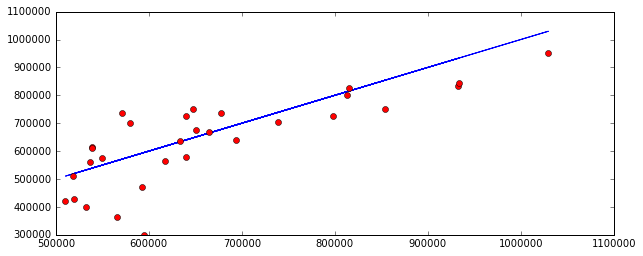

In [13]:
grossArea = smf.ols(formula = 'sale_price ~ gross_sq_feet', data = train).fit()
modelEval(grossArea)

In [14]:
data[['sale_price','gross_sq_feet']].corr()

,sale_price,gross_sq_feet
sale_price,1.000000,0.464211
gross_sq_feet,0.464211,1.000000


Validation R^2 is 0.310054
                            OLS Regression Results                            
Dep. Variable:             sale_price   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     4.026
Date:                Sat, 01 Oct 2016   Prob (F-statistic):             0.0488
Time:                        10:55:13   Log-Likelihood:                -952.07
No. Observations:                  70   AIC:                             1908.
Df Residuals:                      68   BIC:                             1913.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept     4.563e+

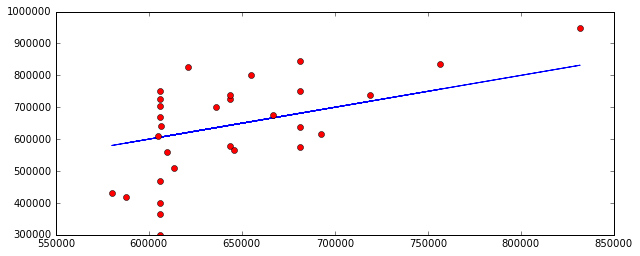

In [15]:
landArea = smf.ols(formula = 'sale_price ~ land_sq_feet', data = train).fit()
modelEval(landArea)

In [16]:
data[['sale_price','land_sq_feet']].corr()

,sale_price,land_sq_feet
sale_price,1.000000,0.335178
land_sq_feet,0.335178,1.000000


Validation R^2 is 0.383525
                            OLS Regression Results                            
Dep. Variable:             sale_price   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     4.413
Date:                Sat, 01 Oct 2016   Prob (F-statistic):             0.0394
Time:                        10:55:13   Log-Likelihood:                -951.88
No. Observations:                  70   AIC:                             1908.
Df Residuals:                      68   BIC:                             1912.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept  

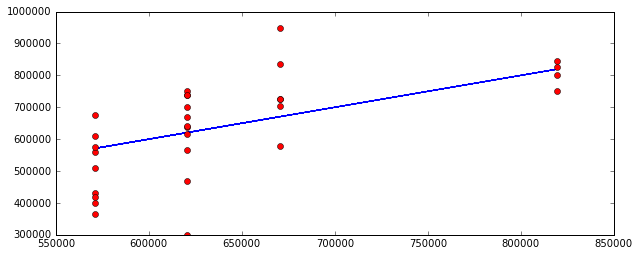

In [17]:
residUnit = smf.ols(formula = 'sale_price ~ residential_units', data = train).fit()
modelEval(residUnit)

In [18]:
data[['sale_price','residential_units']].corr()

,sale_price,residential_units
sale_price,1.00000,0.35734
residential_units,0.35734,1.00000


Validation R^2 is 0.021247
                            OLS Regression Results                            
Dep. Variable:             sale_price   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.012
Method:                 Least Squares   F-statistic:                    0.1497
Date:                Sat, 01 Oct 2016   Prob (F-statistic):              0.700
Time:                        10:55:13   Log-Likelihood:                -954.01
No. Observations:                  70   AIC:                             1912.
Df Residuals:                      68   BIC:                             1917.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   6.638e+05   8

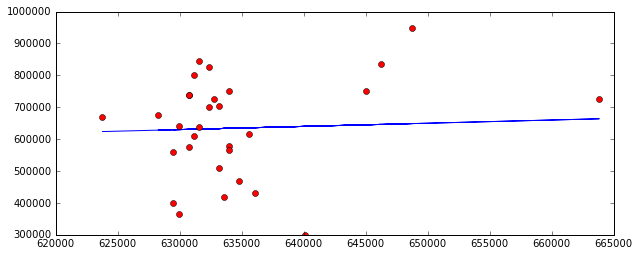

In [19]:
yearGap = smf.ols(formula = 'sale_price ~ year_gap', data = train).fit()
modelEval(yearGap)

In [20]:
data[['sale_price','year_gap']].corr()

,sale_price,year_gap
sale_price,1.000000,-0.088197
year_gap,-0.088197,1.000000


### Overall correlation matrix

In [21]:
data.iloc[:,1:].corr()

,residential_units,land_sq_feet,gross_sq_feet,year_built,sale_price,year_gap
residential_units,1.000000,0.226610,0.722857,0.121964,0.357340,-0.132345
land_sq_feet,0.226610,1.000000,0.415587,0.205548,0.335178,-0.207354
gross_sq_feet,0.722857,0.415587,1.000000,0.363542,0.464211,-0.363559
year_built,0.121964,0.205548,0.363542,1.000000,0.123843,-0.991988
sale_price,0.357340,0.335178,0.464211,0.123843,1.000000,-0.088197
year_gap,-0.132345,-0.207354,-0.363559,-0.991988,-0.088197,1.000000


In [22]:
# Q4. What does this 95% confidence interval tell you?
    # Can you change it to 90% and compute the interval? Or any other given probability?

### Method 1, use conf_int instance

In [23]:
grossArea.conf_int().ix[[-1]] # default setting alpha = 0.05, e.g. 95% CI

,0,1
gross_sq_feet,27.46729,132.930723


In [24]:
grossArea.conf_int(alpha = 0.1).ix[[-1]] # Note this always returns two-sided CI

,0,1
gross_sq_feet,36.132197,124.265816


### Method 2, calculate the CI manually--especially useful for one-sided CI

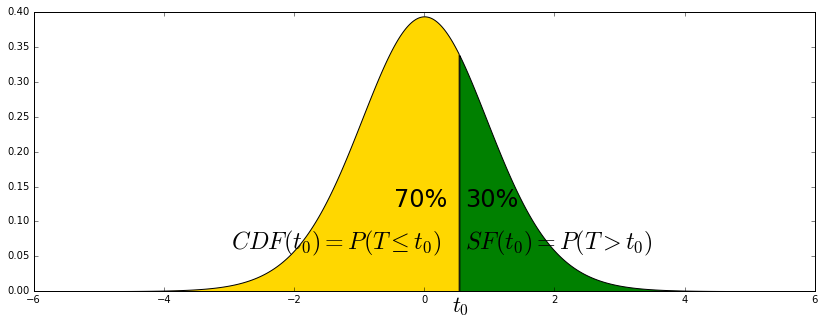

In [47]:
# First introduce t distribution
df = 20    # degree of freedom
q = 0.3
x = np.arange(-5,5,0.01)
y = t.pdf(x, df)
t0 = t.isf(q, df)   # calculate the percentile/partition point
ax = plt.figure(figsize=(14,5)).add_subplot(111)
ax.fill_between(x[x<t0], 0, y[x<t0], facecolor = 'gold')
ax.fill_between(x[x>t0], 0, y[x>t0], facecolor = 'g')
ax.text(t0+0.1,0.06,'$SF(t_0) = P(T>t_0)$', fontsize = 24)
ax.text(t0-3.5,0.06,'$CDF(t_0) = P(T\leq t_0)$', fontsize = 24)
ax.text(t0-1, 0.12, '%.0f%%'%(100*(1-q)), fontsize = 24)
ax.text(t0+0.1,0.12, '%.0f%%'%(100*q), fontsize = 24)
ax.text(t0-0.1, -0.03, '$t_0$', fontsize = 22)

In [26]:
# Now let's compute our 90% CI
key = 'gross_sq_feet'

# One-sided CI, p = 0.9 or q = 1-0.9
    # lower intervel, t.isf(q) or t.ppf(p)
    # upper interval, t.ppf(q) or t.isf(p)
# Two-sided CI, both side, then:
q = (1-0.9)/2
lowerBound = t.ppf(q, grossArea.df_resid) * grossArea.bse[key] + grossArea.params[key]
upperBound = t.isf(q, grossArea.df_resid) * grossArea.bse[key] + grossArea.params[key]
print('[%f,%f]'%(lowerBound,upperBound))

[36.132197,124.265816]


In [27]:
# Compare with the result before
grossArea.conf_int(alpha = 0.1).ix[[1]]

,0,1
gross_sq_feet,36.132197,124.265816


In [28]:
# Q5. Next we do it reversely, suppose you are given the "average price per square foot" p0
    # What is the probability that a real avg. price per sq. foot is higher/lower than p0?
    # Compute this probability if p0 = $50.

In [29]:
# Lower than 50:
t.cdf((50 - grossArea.params[key])/grossArea.bse[key], grossArea.df_resid)

0.12856711429386841

In [30]:
# Higher than 50:
# Or simply subtract previous result from 1
t.sf((50 - grossArea.params[key])/grossArea.bse[key], grossArea.df_resid)

0.87143288570613153

# Example 2.
### Multivariate regression with housing price data

In [31]:
# Q1. Use the same dataset as Example 1, same training set and validation set
# Q2. Now regress the sale price over the following ALTOGETHER
    # residential_units
    # land_sq_feet
    # gross_sq_feet
    # year_gap
# Q3. How does our model look like?
    # Observe how p-values and confidence intervals changed compared to Example 1.
# Q4. Simply remove the features with high p-value then re-run the regression, what happens?
# Q5. What if we just randomly remove a feature regardless of its p-value? Experiment!
    # -- What happened to the coefficients as well as the other statistics of EACH feature?
    # -- Which model gives the highest validation R-squared?

Validation R^2 is 0.559356
                            OLS Regression Results                            
Dep. Variable:             sale_price   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.104
Method:                 Least Squares   F-statistic:                     2.997
Date:                Sat, 01 Oct 2016   Prob (F-statistic):             0.0247
Time:                        10:55:15   Log-Likelihood:                -948.16
No. Observations:                  70   AIC:                             1906.
Df Residuals:                      65   BIC:                             1918.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept  

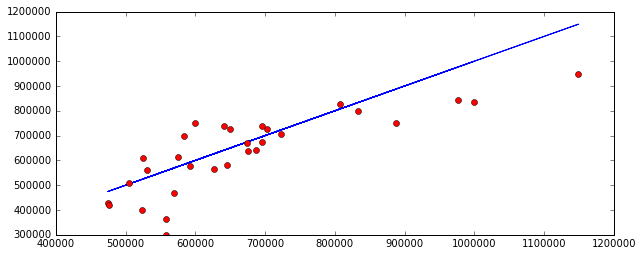

In [32]:
multi0 = smf.ols(formula = 'sale_price ~ land_sq_feet + gross_sq_feet\
            + residential_units + year_gap', data = train).fit()
modelEval(multi0)

## In this summary table we can see that the coefficients are implying:
* Avg. Base price   \$21,750
* Avg. Price per Sq.Foot (land)  \$54.7245
* Ave. Price per Sq.Foot (gross) \$83.5590
* Avg. Additional Price per Residential Units \$-2860.9559
* Avg. Additional Price per Year Gap \$1089.0144

### So the older the house, the higher the price. Do you believe this?

### Experiment 1. Drop the "year_gap":

Validation R^2 is 0.600341
                            OLS Regression Results                            
Dep. Variable:             sale_price   R-squared:                       0.143
Model:                            OLS   Adj. R-squared:                  0.104
Method:                 Least Squares   F-statistic:                     3.673
Date:                Sat, 01 Oct 2016   Prob (F-statistic):             0.0164
Time:                        10:55:15   Log-Likelihood:                -948.68
No. Observations:                  70   AIC:                             1905.
Df Residuals:                      66   BIC:                             1914.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept  

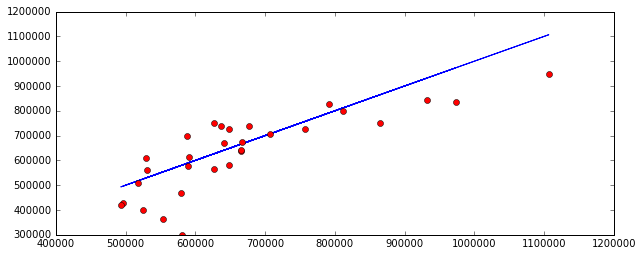

In [33]:
multi1 = smf.ols(formula = 'sale_price ~ land_sq_feet + gross_sq_feet\
            + residential_units', data = train).fit()
modelEval(multi1)

### Observations:
* Validation $R^2$ increases
* The coefficient of Residential Units flipped the sign

### Experiment 2, drop the feature "residential_units"
(Validation $R^2$ drops slightly but still higher than original model)

Validation R^2 is 0.593962
                            OLS Regression Results                            
Dep. Variable:             sale_price   R-squared:                       0.143
Model:                            OLS   Adj. R-squared:                  0.117
Method:                 Least Squares   F-statistic:                     5.588
Date:                Sat, 01 Oct 2016   Prob (F-statistic):            0.00569
Time:                        10:55:16   Log-Likelihood:                -948.68
No. Observations:                  70   AIC:                             1903.
Df Residuals:                      67   BIC:                             1910.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept       3.3

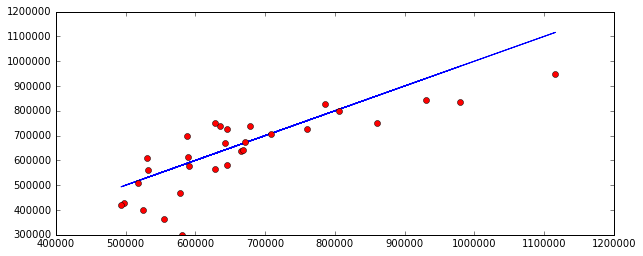

In [34]:
multi2 = smf.ols(formula = 'sale_price ~ land_sq_feet + gross_sq_feet', data = train).fit()
modelEval(multi2)

# Example 3
### Feature selection based on maximizing validation $R^2$, rather than p-values

### Please ignore this cell as it was for experiment purpose only and will be deleted soon
possSeed = [32, 42, 44, 59, 130, 216, 228, 280, 298, 427, 454, 473,
            483, 512, 537, 629, 906, 1149, 1215, 1239, 1289, 1417,
            1418, 1422, 1491, 1541, 1889, 1950, 1992, 2022, 2082,
            2110, 2155, 2201, 2208, 2239, 2248, 2272, 2325, 2350,
            2355, 2384, 2387, 2389, 2483, 2489]

In [35]:
n = 15
random.seed(32)

col = []
for i in range(n):
    col.append('x%d'%(i+1))

X = pd.DataFrame(np.random.randn(50*n).reshape(50,n))
Y = X.ix[:,:3].sum(axis = 1) + np.random.randn(50)
data3 = pd.concat((Y,X), axis = 1)
data3.columns = ['Y'] + col

The regular $R^2$:
$$
R^2=1-\frac{RSS}{\sum\limits_i (y_i-\bar{y})^2}=\frac{\sum\limits_i (\hat{y}_i-\bar{y})^2}{\sum\limits_i (y_i-\bar{y})^2},
$$
The adjusted $R^2$:
$$
adj.R^2=1-\frac{RSS}{\sum\limits_i (y_i-\overline{y})^2} \cdot \frac{N-1}{N-P-1} 
$$
where $N$ is the total sample size and $P$ is the number of features/selected variables

In [36]:
# The regression function based on the feature selection
def Regress(mask):
    '''Evalute the model with adjusted R-squared'''
    formstr='Y~-1'
    for i in range(len(mask)):
        if mask[i]==1:
            formstr += '+x%d'%(i+1)

    train = data3[:20]
    valid = data3[20:]
    lm = smf.ols(formula = formstr, data = train).fit()
    lmy = lm.predict(valid)
    y_err = lmy-valid.Y
    y_norm = valid.Y-mean(valid.Y)
    # Adjusted R^2
    R2 = 1 - y_err.dot(y_err) / y_norm.dot(y_norm) * (n-1) / (n-sum(mask)-1)
    return (R2,lm)

### Revisit the overfitting:

In [37]:
adjR2 = []
regR2 = []
for i in range(1, n):
    a,b = Regress([1]*i + [0]*(n-i))
    adjR2.append(a)
    regR2.append(b.rsquared)

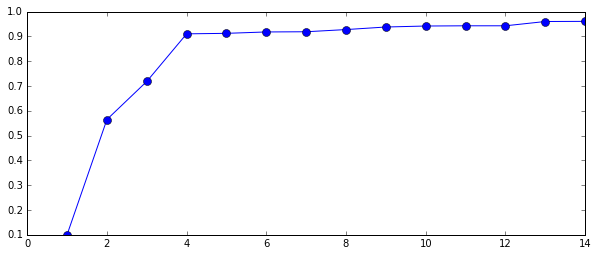

In [38]:
# In sample R2
plt.plot(range(1, n), regR2, 'b-o', markersize = 8)

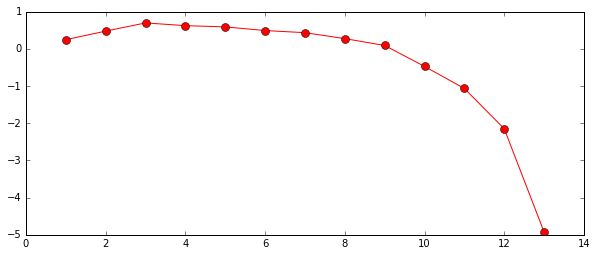

In [39]:
# Out of sample R2 (adjusted)
plt.plot(range(1, n), adjR2, 'r-o', markersize = 8)

In [40]:
# Feature selection based on the p-values
def DropP(threshold = 1):
    '''Drop all features with p-values higher than the threshold'''
    mask_p = (Regress([1]*n)[1]).pvalues < threshold
    print('Validation R^2 is %f'%Regress(mask_p)[0])
    print(Regress(mask_p)[1].summary())

### First of all, let's try to include all features and observe their p-values
Note that if we include them all, we have a nagative one (n-n-1) in the denominator, 
$$
adj.R^2=1-\frac{RSS}{\sum\limits_i (y_i-\overline{y})^2} \cdot \frac{N-1}{N-P-1} 
$$
which simply flips the sign of the second term of the right hand side, making the adjusted $R^2$ ridiculously high

In [41]:
DropP(1)

Validation R^2 is 7.793794
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     8.296
Date:                Sat, 01 Oct 2016   Prob (F-statistic):             0.0143
Time:                        10:55:17   Log-Likelihood:                -15.171
No. Observations:                  20   AIC:                             60.34
Df Residuals:                       5   BIC:                             75.28
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.7154    

### If we remove variables based on their p-value (if > 0.2), then we'll keep $x_2,x_3,x_4$, and the model's out of sample $R^2$ is 0.251312

In [42]:
DropP(0.2)

Validation R^2 is 0.251312
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     14.58
Date:                Sat, 01 Oct 2016   Prob (F-statistic):           5.93e-05
Time:                        10:55:17   Log-Likelihood:                -34.977
No. Observations:                  20   AIC:                             75.95
Df Residuals:                      17   BIC:                             78.94
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x2             0.9169    

### Next we try to select feature in a fashion that maximizing validation adjusted $R^2$

In [43]:
# Find the best feature selection that maximizes the out-of-sample adjusted R-squared
def FindBestI():
    mask0 = [0] * n  # initially exclude all regressors
    r2_0 = 0         # for storing and compare with best R^2
    ix = []          # for storing the finally selected features
    while True:
        bestI = -1   # best regressor to exclude
        for i in range(0,n):
            if (mask0[i] == 0):
                mask = mask0[:] # creates a copy, not reference
                mask[i] = 1     # attempt to select this feature and see if it increases our R^2
                r2 = Regress(mask)[0]
                if (r2 > r2_0):
                    r2_0 = r2
                    bestI = i
        if (bestI >= 0):        # if we select this feature (otherwise it should be -1 as initially defined) 
            mask0[bestI] = 1    # flag this feature in the mask0
            ix.append('x%d'%(bestI+1))
        else:
            break               # if no more feature is added, we quit the loop
    return mask0, ix

mask0, ix = FindBestI()         # store the best choice of feature selection
(r2_best,lm_best) = Regress(mask0)  # then run the regression based on such selection

#np.abs((data.corr() - np.eye(n+1))).max().max()
b = pd.DataFrame({'Pvalues':Regress([1]*n)[1].pvalues, 'Keeper':col})
c = 'forestgreen'
def highlight_pval(val):
    color = c if val in ix else 'white'
    return 'background-color: %s'% color

b.style.\
    applymap(highlight_pval, subset=['Keeper']).\
    bar(subset = ['Pvalues'], color=c)

### The length of green bar in right column indicates the p-value, and we can see that despite having high p-value,  $x_1$ is still included in our "best fit", which accurately reflects our true model that $y \sim x_1 + x_2 + x_3$

In [44]:
print('Validation R^2 is %f'%r2_best)
print(lm_best.summary())

Validation R^2 is 0.695993
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     14.45
Date:                Sat, 01 Oct 2016   Prob (F-statistic):           6.24e-05
Time:                        10:55:18   Log-Likelihood:                -35.039
No. Observations:                  20   AIC:                             76.08
Df Residuals:                      17   BIC:                             79.07
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.8811    